# Analysis of What Causes Movies to be Popular

### Final Project COGS 108 Spring 2019

Team 61: The Best of The Best

- Calvin Tjoeng A14765257 
- Dan Mu A14719967 
- Anik Zingariello A14924938 
- Xuege Gao A14577710 
- Haonan Peng A14765890

## 0. Project Outline

Sections:
1. [Project Setup](#1.-Project-Setup)
2. [Data Wrangling/Cleaning & Pre-processing](#2.-Data-Wrangling/Cleaning-&-Pre-processing)
3. [Data Exploration](#3.-Data-Exploration)
4. [Data Visualization](#4.-Data-Visualization)
5. [Data Analysis and Results](#5.-Data-Analysis-and-Results)
6. [Ethics and Privacy](#6.-Ethics-and-Privacy)
7. [Conclusion and Discussion](#7.-Conclusion-and-Discussion)

#### 0.1 Overview

Some movies are popular amomg publics, others are not.

When it comes to the factors that determine the popularity of movies, what come into our minds are cast & crew, rating, net profit...

Among those possible factors, some indeed influence the popularity of the movies; however some factors in fact have no effect on popularity of the movie.

In this project, we will first give a hypothesis about the factors that indeed determine the popularity of the movie. Then, we will dig into our large datasets. After cleaning the data and visualize the data, we will analyze the data intensively, and finally reach to the conclusion regarding whether or not our initial hypothesis is true or not.

#### 0.2 Research Questions

- Which factors are most important for the movie to be popular and successful? 
- Are ratings and votes determining factors?
- Does profit play its part in defining popularity of movies?
- Do genres and production companies come into the mix too?

#### 0.3 Hypothesis

We hypothesize that ratings and/or votes and profit are determining factors to movies' popularity; while genres and production companies are not. The reason can be explained with an answer to this one question/analogy:

Suppose there is a popular movie called "Foo" and we know that the `x-factor` of "Foo" is some value. Now suppose that there is another movie "Bar", which we don't know if it is popular or not, but we know the fact that the `x-factor` of "Bar" has the same value as the `x-factor` of "Foo". Knowing all these, do you think the popularity of "Bar" would likely be somewhat similar to the popularity of "Foo"? Or would it be nowhere close?

Now try to replace `x-factor` with either rating, vote, profit, genres, or production companies. If your answer is "similar", then the `x-factor` is a determining factor; otherwise, it is not.

#### 0.4 Background and Prior Work

Some movies are popular among the public, others are not. The Movies Dataset on Kaggle that we are using contains several files, including `movie_metadata.csv` and `ratings_small.csv`, measuring about 45,000 movies. `movie_metadata.csv` contains data about budget, genres, original language, popularity, and almost all other elements that can label or describe a movie. `ratings_small.csv` contains information pertaining to the ratings for movies in the file. 

As the datasets show, a large number of factors specifically the genre, budgets & revenues, production companies and votes, can largely affect the popularity of movie. Our project’s goal is firstly to generate a meaningful and data science-based question, then find and read the appropriate datasets, later using codes and statistical methods to do data cleaning, data visualization, and data analysis, then finally draw a conclusion and present our findings! 

In Michal Bogacz’s project of “Are popular movies good”, he analyzed the 10,000 most popular movies to determine how “good” these films were by comparing their IMDb rating, Metascore, revenue and so on. From his project, we have the basic ideas of what factors should be collected to determine the popularity of films and how to visualize the data. https://www.kaggle.com/michau96/are-popular-movies-good/data

#### 0.5 Datasets

We are using some datasets that can be found from this webpage: https://www.kaggle.com/rounakbanik/the-movies-dataset 

Since we are wondering which factors are important in determining the popularity or success of movies, we found the useful datasets in the webpage above. Some of the datasets include the correlations between:
- Genres, budget & revenue (net profit), production companies (all found in the dataset called `movies_metadata.csv`) influence the popularity of the movies (Link: https://www.kaggle.com/rounakbanik/the-movies-dataset#movies_metadata.csv). The dataset contains all the factors mentioned above, including some extra factors like overview, link to poster, runtime, etc. We are not sure how many entries are present in this dataset, but the filesize is 32.85 MB, and we are certain it has more than 10,000 rows, according to the file size. 
- Ratings and movies. This one can specifically be found in `ratings_small.csv` (Link: https://www.kaggle.com/rounakbanik/the-movies-dataset#ratings_small.csv). This dataset generally contains the ratings of each movie by different users, nothing more.

## 1. Project Setup

#### 1.1 Import libary

In [1]:
%matplotlib inline
import json
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, normaltest, norm
import patsy
import statsmodels.api as sm

In [2]:
# to ignore all warnings
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Read data from csv file

Store the data in variables called `movie` and `ratings`, correspondingly

In [3]:
movie = pd.read_csv("movies_metadata.csv")
ratings = pd.read_csv("ratings_small.csv")

#### 1.3 Check column labels

In [4]:
movie.columns.values

array(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'], dtype=object)

In [5]:
ratings.columns.values

array(['userId', 'movieId', 'rating', 'timestamp'], dtype=object)

## 2. Data Wrangling/Cleaning & Pre-processing

#### 2.1 Remove and/or rename unnecessary columns

In [6]:
movie.drop(columns = ['adult', 'belongs_to_collection', 'homepage', 'imdb_id',
                      'original_language', 'original_title', 'overview', 'poster_path',
                      'production_countries', 'spoken_languages', 'status', 'tagline',
                      'video', 'vote_count'], inplace = True)
movie.head()

,budget,genres,id,popularity,production_companies,release_date,revenue,runtime,title,vote_average
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,Toy Story,7.7
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,Jumanji,6.9
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,Grumpier Old Men,6.5
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7


In [7]:
ratings.drop(columns = ['userId', 'timestamp'], inplace = True)
ratings.columns = ['id', 'rating']
ratings['id'] = ratings['id'].astype(str)
ratings.head()

,id,rating
0,31,2.5
1,1029,3.0
2,1061,3.0
3,1129,2.0
4,1172,4.0


#### 2.2 Group rating by id and calculate the average rating of each id

In [8]:
ratings = ratings.groupby('id', as_index=False)['rating'].mean()

#### 2.3 Merge movie and ratings

Store the DataFrame in a variable called `df`

In [9]:
df = pd.merge(movie, ratings, on='id')
df.head()

,budget,genres,id,popularity,production_companies,release_date,revenue,runtime,title,vote_average,rating
0,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,170.0,Heat,7.7,3.593750
1,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,14.686,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,130.0,GoldenEye,6.6,1.500000
2,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1408,7.28448,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na...",1995-12-22,10017322.0,119.0,Cutthroat Island,5.7,3.616279
3,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",524,10.1374,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1995-11-22,116112375.0,178.0,Casino,7.8,3.555556
4,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",4584,10.6732,"[{'name': 'Columbia Pictures Corporation', 'id...",1995-12-13,135000000.0,136.0,Sense and Sensibility,7.2,5.000000


#### 2.4 Remove Na's

In [10]:
df.dropna(how='any', inplace=True)

#### 2.5 Remove unnecessary data in budget

We believed that any movies with budget less than $1,000 are false records.

In [11]:
df['budget'] = df['budget'].astype(np.float64)
df = df[df['budget'] > 1000.0]

#### 2.6 Remove unnecessary data in revenue

In [12]:
df['revenue'] = df['revenue'].astype(np.float64)
df = df[df['revenue'] > 0.0]

#### 2.7 Add a new column net_profit, which stores the value of `revenue - budget`

*Note:* if the value of is negative, it means that the corresponding movie suffers financial loss.

In [13]:
df['net_profit'] = [df.loc[i, 'revenue'] - df.loc[i, 'budget'] for i in df.index]

#### 2.8 Drop columns budget and revenue

Since we now have the new column net_profit, we feel like having columns budget and revenue are not necessary any further.

In [14]:
df.drop(columns=['budget', 'revenue'], inplace=True)

#### 2.9 Remove unnecessary data in genres

In [15]:
def clean_genres(genres):
    string = genres.replace("\'","\"")
    type_list = json.loads(string)
    movie_type = []
    for j in type_list:
        movie_type.append(j['name'])
    return movie_type if len(movie_type) > 0 else pd.NaT

In [16]:
df['genres'] = df['genres'].apply(clean_genres)
df = df.dropna(subset=['genres'])

#### 2.10 Remove unnecessary data in production_companies

In [17]:
def clean_production_companies(companies):
    s = companies.replace("\'","\"")
    companies_list = []
    try:
        companies_list = json.loads(s)   # try to parse...
    except Exception as e:
        # "Expecting , delimiter: line 34 column 54 (char 1158)"
        # position of unexpected character after '"'
        unexp = int(re.findall(r'\(char (\d+)\)', str(e))[0])
        # position of unescaped '"' before that
        unesc = s.rfind(r'"', 0, unexp)
        s = s[:unesc] + r'\"' + s[unesc+1:]
        # position of correspondig closing '"' (+2 for inserted '\')
        closg = s.find(r'"', unesc + 2)
        s = s[:closg] + r'\"' + s[closg+1:]
        
    result = []
    for comp in companies_list:
        result.append(comp['name'])
    return result if len(result) > 0 else pd.NaT

In [18]:
df['production_companies'] = df['production_companies'].apply(clean_production_companies)
df = df.dropna(subset=['production_companies'])

#### 2.11 Make sure `popularity` and `vote_average` are of type `np.float64`; while `id` and `runtime` are of type `np.int64`

In [19]:
df['popularity'] = df['popularity'].astype(np.float64)
df['vote_average'] = df['vote_average'].astype(np.float64)
df['id'] = df['id'].astype(np.int64)
df['runtime'] = df['runtime'].astype(np.int64)

#### 2.12 Reorder the columns of `df`, sort it based on `id`, and reset the index

In [20]:
df = df[['id', 'title', 'release_date', 'genres', 'runtime', 'popularity', 'rating',
         'vote_average', 'net_profit', 'production_companies']]
df = df.sort_values(by=['id'])
df.reset_index(drop=True, inplace=True)

#### 2.13 Drop any duplicate values, and any Na's again

In [21]:
df.drop_duplicates(subset=['id'], inplace=True)
df.dropna(how='any', inplace=True)

#### 2.14 Make sure that the current dataset has at least 1000 observations, also make sure all rows are unique

In [22]:
assert len(df) >= 1000
assert len(df) == len(df['id'].unique())

#### 2.15 Display `df` post-cleaning

In [23]:
df.head()

,id,title,release_date,genres,runtime,popularity,rating,vote_average,net_profit,production_companies
0,5,Four Rooms,1995-12-09,"[Crime, Comedy]",98,9.026586,3.267857,6.5,300000.0,"[Miramax Films, A Band Apart]"
1,11,Star Wars,1977-05-25,"[Adventure, Action, Science Fiction]",121,42.149697,3.689024,8.1,764398007.0,"[Lucasfilm, Twentieth Century Fox Film Corpora..."
2,12,Finding Nemo,2003-05-30,"[Animation, Family]",100,25.497794,2.861111,7.6,846335536.0,[Pixar Animation Studios]
3,13,Forrest Gump,1994-07-06,"[Comedy, Drama, Romance]",142,48.307194,3.937500,8.2,622945399.0,[Paramount Pictures]
4,14,American Beauty,1999-09-15,[Drama],122,20.726578,3.451613,7.9,341296601.0,"[DreamWorks SKG, Jinks/Cohen Company]"


## 3. Data Exploration

#### 3.1 `popularity` exploration

###### 3.1.1 Get the descriptive summary of `popularity`

In [24]:
df['popularity'].describe()

count    1001.000000
mean       11.604160
std         8.563963
min         0.202478
25%         7.738531
50%        10.513367
75%        13.328924
max       140.950236
Name: popularity, dtype: float64

###### 3.1.2 Get the quantile value of the top 20% movies

Store it in a variable called `top_pop`

We decided that the top 20% is the benchmark to define that movies can be considered popular

In [25]:
top_pop = df['popularity'].quantile(.8)
top_pop

14.207001000000002

Store the top 20% movies DataFrame in `top_df`

In [26]:
top_df = df[df['popularity'] > top_pop]

#### 3.2 `net_profit` exploration

###### 3.2.1 Get the descriptive summary of `net_profit`

In [27]:
df['net_profit'].describe()

count    1.001000e+03
mean     9.275597e+07
std      1.542020e+08
min     -9.830110e+07
25%      4.419397e+06
50%      3.564960e+07
75%      1.201285e+08
max      1.645034e+09
Name: net_profit, dtype: float64

###### 3.2.2 Get the average `net_profit` of the top 20% movies

Store it in `top_net`

In [28]:
top_net = top_df['net_profit'].mean()
top_net

215735435.955

In [29]:
if top_net > df['net_profit'].mean():
    print("EXPECTED: Greater than overall average!")
else:
    print("UNEXPECTED: Lower than overall average!")

EXPECTED: Greater than overall average!


As we can roughly see, `top_net` outnumbers all of the attributes of the descriptive summary of overall data, except for the max, as we expected.

###### 3.2.3 Make sure `top_net` is greater than the overall average of net profit

In [30]:
assert top_net > df['net_profit'].mean()

#### 3.3 `rating` exploration

###### 3.3.1 Get the descriptive summary of `rating`

In [31]:
df['rating'].describe()

count    1001.000000
mean        3.353050
std         0.771349
min         0.500000
25%         3.000000
50%         3.462963
75%         3.875000
max         5.000000
Name: rating, dtype: float64

From the data above, we assume that the range value of column rating is [0.0, ..., 5.0]

###### 3.3.2 Get the average `rating` of the top 20% movies

Store it in `top_rating`

In [32]:
top_rating = top_df['rating'].mean()
top_rating

3.3990464741121955

In [33]:
if top_rating > df['rating'].mean():
    print("EXPECTED: Greater than overall average!")
else:
    print("UNEXPECTED: Lower than overall average!")

EXPECTED: Greater than overall average!


Based on the value of `top_rating` above, we can see that the average rating of the top 20% movies, even though is slightly greater than the overall average, is lower than the 50th and 75th percentiles of the overall data. We sort of expected `top_rating` to be greater than the percentiles.

#### 3.4 `vote_average` exploration

###### 3.4.1 Get the descriptive summary of `vote_average`

In [34]:
df['vote_average'].describe()

count    1001.000000
mean        6.676623
std         0.844567
min         2.300000
25%         6.100000
50%         6.700000
75%         7.300000
max         8.500000
Name: vote_average, dtype: float64

From the data above, we assume that the range value of column vote_average is [0.0, ..., 10.0]

###### 3.4.2 Get the average `vote_average` of the top 20% movies

Store it in `top_vote`

In [35]:
top_vote = top_df['vote_average'].mean()
top_vote

7.122000000000001

In [36]:
if top_vote > df['vote_average'].mean():
    print("EXPECTED: Greater than overall average!")
else:
    print("UNEXPECTED: Lower than overall average!")

EXPECTED: Greater than overall average!


Now we can examine that the difference between `top_vote` and the average of the overall data is quite convincing; however, it does not surpass the 75th percentile. Again, this is pretty unexpected.

#### 3.5 `genres` exploration

###### 3.5.1 Collect different `genres` available in `df`

Store them in a list called `genres` and its `value_counts()` in `genres_vc`

In [37]:
genres_raw = []
for genre in df['genres']:
    genres_raw += genre
genres = list(set(genres_raw))

In [38]:
genres_vc = pd.Series(genres_raw).value_counts()
genres_vc.head()

Drama        500
Thriller     342
Comedy       289
Action       276
Adventure    211
dtype: int64

###### 3.5.2 Get the `genres` of the top 20% movies

Store them in `top_genres`, and in `top_genres_vc` for the `value_counts()`

In [39]:
top_genres_raw = top_df['genres']
top_genres = []
for top_gen in top_genres_raw:
    top_genres += top_gen
top_genres_vc = pd.Series(top_genres).value_counts()
top_genres_vc.head()

Action       79
Drama        77
Adventure    68
Thriller     67
Fantasy      45
dtype: int64

###### 3.5.3 Make sure that the top 3 genres in `genres_vc` are in `top_genres`

In [40]:
assert 'Drama' in top_genres
assert 'Thriller' in top_genres
assert 'Comedy' in top_genres

###### 3.5.4 Get the average `popularity` for each genre in the overall data

Store it in a Series called `pop_genres`

In [41]:
pop_genres_dict = dict([(g, []) for g in genres])
for idx, data in df[['genres', 'popularity']].iterrows():
    for g in data['genres']:
        pop_genres_dict[g].append(data['popularity'])
        
pop_genres = pd.Series({ key: np.mean(value) for key, value in pop_genres_dict.items() })
pop_genres.head()

Comedy             10.160293
Family             13.551611
Science Fiction    12.225156
Romance             9.792954
Fantasy            14.917978
dtype: float64

###### 3.5.5 Get the average `popularity` for each genre in the top 20% movies

Store it in a Series called `top_pop_genres`

In [42]:
top_pop_genres_dict = dict([(g, []) for g in list(set(top_genres))])
for idx, data in top_df[['genres', 'popularity']].iterrows():
    for g in data['genres']:
        top_pop_genres_dict[g].append(data['popularity'])
        
top_pop_genres = pd.Series({ key: np.mean(value) for key, value in top_pop_genres_dict.items() })
top_pop_genres.head()

Comedy             18.459326
Family             20.319982
Science Fiction    21.665384
Romance            19.160698
Fantasy            21.737466
dtype: float64

#### 3.6 `production_companies` exploration

###### 3.6.1 Collect different `production_companies` available in `df`

Store them in a list called `companies` and its `value_counts()` in `companies_vc`

In [43]:
companies_raw = []
for company in df['production_companies']:
    companies_raw += company
companies = list(set(companies_raw))

In [44]:
companies_vc = pd.Series(companies_raw).value_counts()
companies_vc.head()

Warner Bros.                              117
Paramount Pictures                         99
Universal Pictures                         92
Twentieth Century Fox Film Corporation     70
Metro-Goldwyn-Mayer (MGM)                  37
dtype: int64

###### 3.6.2 Get the `production_companies` of the top 20% movies

Store them in `top_companies`, and in `top_companies_vc` for the `value_counts()`

In [45]:
top_companies_raw = top_df['production_companies']
top_companies = []
for top_comp in top_companies_raw:
    top_companies += top_comp
top_companies_vc = pd.Series(top_companies).value_counts()
top_companies_vc.head()

Warner Bros.                              34
Paramount Pictures                        26
Twentieth Century Fox Film Corporation    20
Universal Pictures                        20
Miramax Films                             12
dtype: int64

###### 3.6.3 Make sure that the top 3 production companies in `companies_vc` are in `top_companies`

In [46]:
assert 'Warner Bros.' in top_companies
assert 'Paramount Pictures' in top_companies
assert 'Universal Pictures' in top_companies

###### 3.6.4 Get the average `popularity` for each production company in the overall data

Store it in a Series called `pop_companies`

In [47]:
pop_companies_dict = dict([(c, []) for c in companies])
for idx, data in df[['production_companies', 'popularity']].iterrows():
    for c in data['production_companies']:
        pop_companies_dict[c].append(data['popularity'])
        
pop_companies = pd.Series({ key: np.mean(value) for key, value in pop_companies_dict.items() })
pop_companies.head()

Stanley Kubrick Productions    16.568195
Egg Films                      10.616859
A&M Films                      12.627678
Carolco Pictures               11.372142
Saturn Films                   15.732864
dtype: float64

###### 3.6.5 Get the average `popularity` for each production company in the top 20% movies

Store it in a Series called `top_pop_companies`

In [48]:
top_pop_companies_dict = dict([(c, []) for c in list(set(top_companies))])
for idx, data in top_df[['production_companies', 'popularity']].iterrows():
    for c in data['production_companies']:
        top_pop_companies_dict[c].append(data['popularity'])
        
top_pop_companies = pd.Series({ key: np.mean(value) for key, value in top_pop_companies_dict.items() })
top_pop_companies.head()

Stanley Kubrick Productions    22.494622
Cheyenne Enterprises           14.886039
Mace Neufeld Productions       15.911260
Carolco Pictures               22.661695
Splendid Pictures              19.833077
dtype: float64

## 4. Data Visualization

#### 4.1 `net_profit`, `rating`, and `vote_average` charts

###### 4.1.1 Plot a scatter matrix for the overall data

(0, 125)

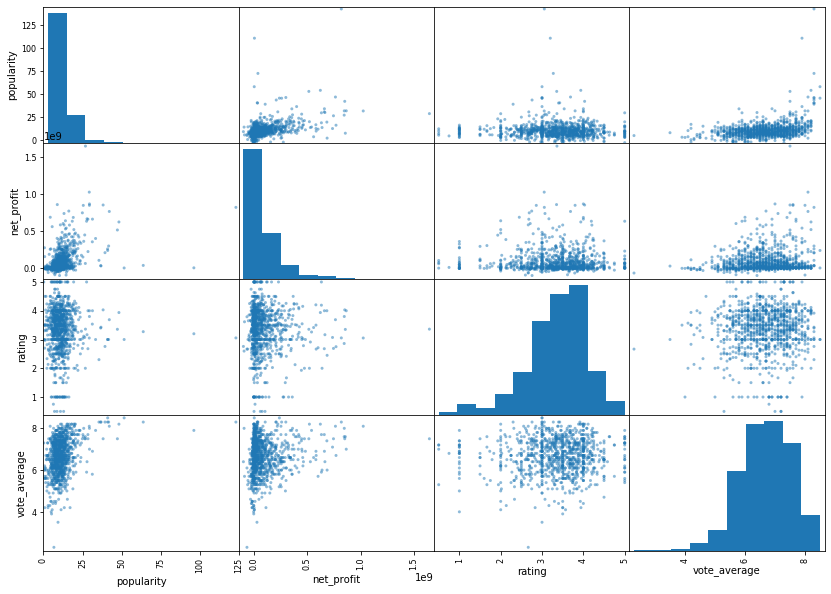

In [49]:
nrv_plt = pd.plotting.scatter_matrix(df[['popularity', 'net_profit', 'rating', 'vote_average']],
                                     grid=True, figsize=(14, 10), alpha=0.5)
nrv_plt[0,1].set_ylim(0,125)
nrv_plt[0,2].set_ylim(0,125)
nrv_plt[0,3].set_ylim(0,125)
nrv_plt[1,0].set_xlim(0,125)
nrv_plt[2,0].set_xlim(0,125)
nrv_plt[3,0].set_xlim(0,125)

###### 4.1.2 Plot a scatter matrix for the top 20% movies

(0, 125)

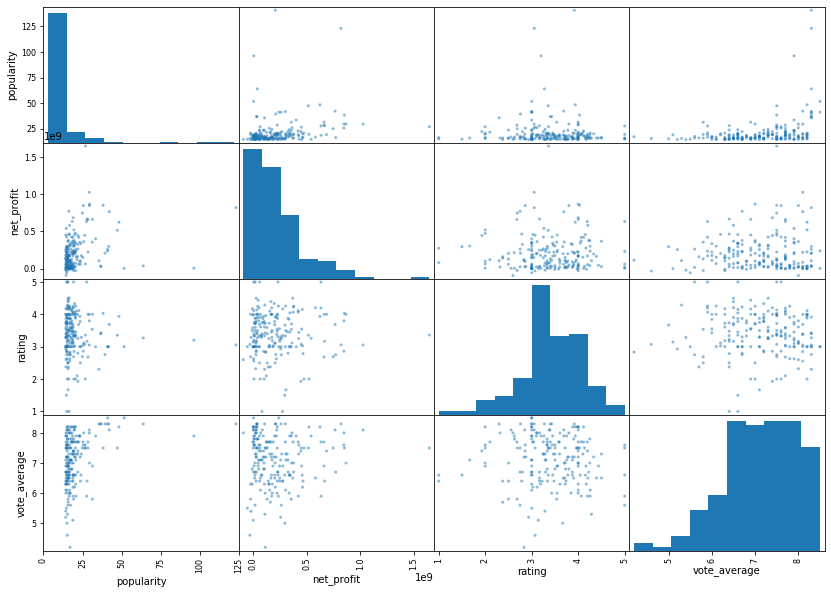

In [50]:
nrv_plt = pd.plotting.scatter_matrix(top_df[['popularity', 'net_profit', 'rating', 'vote_average']],
                                     grid=True, figsize=(14, 10), alpha=0.5)
nrv_plt[1,0].set_xlim(0,125)
nrv_plt[2,0].set_xlim(0,125)
nrv_plt[3,0].set_xlim(0,125)

#### 4.2 `genres` charts

###### 4.2.1 Plot bar charts for the number of movies in each genre

We want to compare the number of movies of the overall data vs. the top 20% movies. In other words, plot `genres_vc` vs. `top_genres_vc`

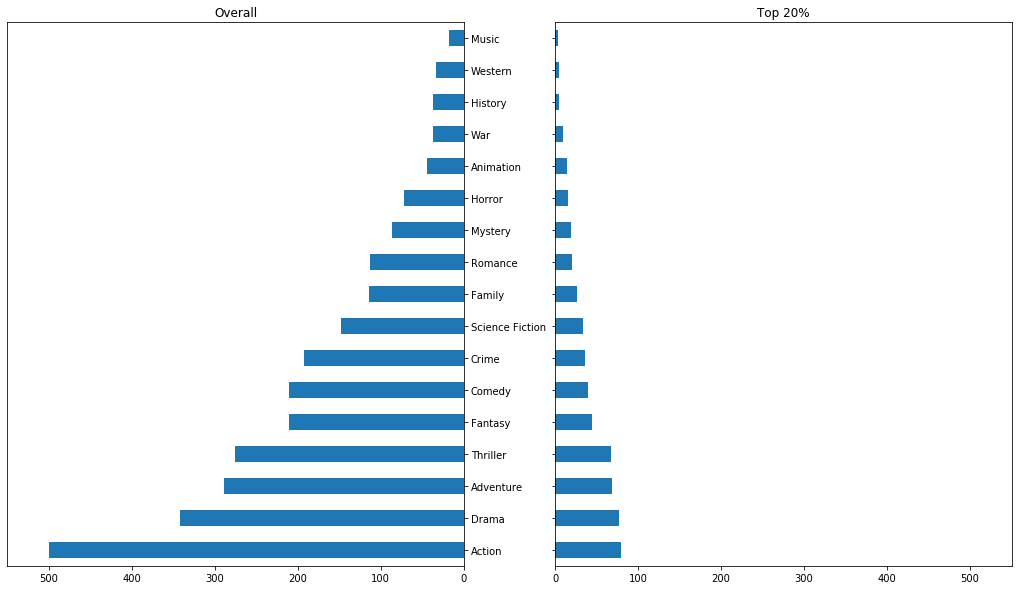

In [51]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
ax.invert_xaxis()
ax.yaxis.tick_right()

genres_vc.plot(kind='barh', title='Overall', figsize=(18,10), xlim=(550, 0), ax=ax)
top_genres_vc.plot(kind='barh', title='Top 20%', figsize=(18,10), xlim=(0, 550), ax=ax2)

###### 4.2.2 Plot bar charts for the average popularity of movies in each genre

Now we want to compare the average popularity of movies of the overall data vs. the top 20% movies, which means `pop_genres` vs. `top_pop_genres`

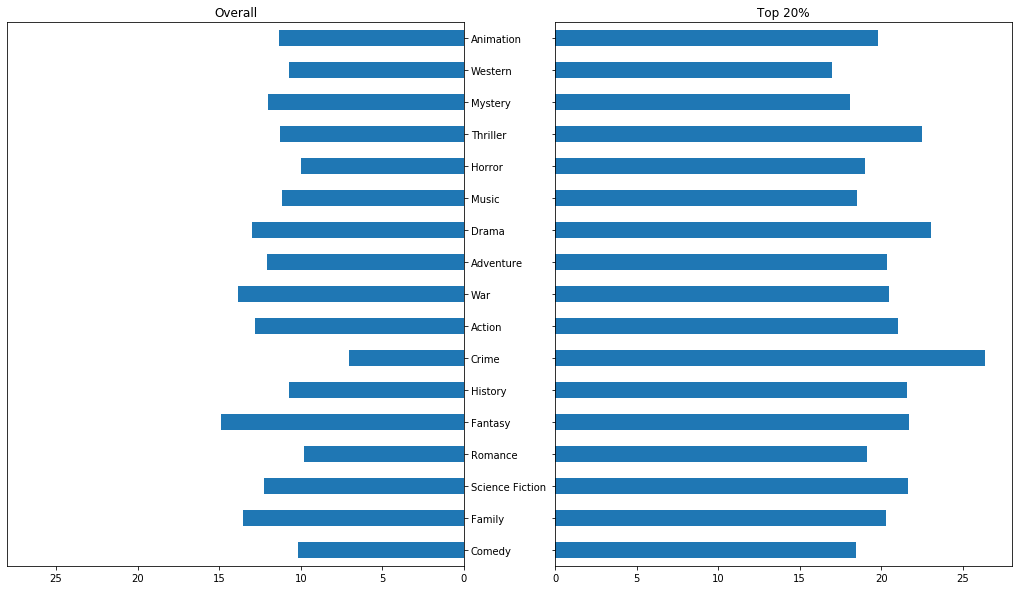

In [52]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
ax.invert_xaxis()
ax.yaxis.tick_right()

pop_genres.plot(kind='barh', title='Overall', figsize=(18,10), xlim=(28, 0), ax=ax)
top_pop_genres.plot(kind='barh', title='Top 20%', figsize=(18,10), xlim=(0, 28), ax=ax2)

#### 4.3 `production_companies` charts

*Note:* There are too many production companies to be shown within one bar chart; thus for presentation purposes, we are going to plot only the top 50 companies in the `value_counts()` list in each subsection below.

###### 4.3.1 Plot bar charts for the number of movies produced by each company

We want to compare the number of movies produced of the overall data vs. the top 20% movies. In other words, plot `companies_vc` vs. `top_companies_vc`

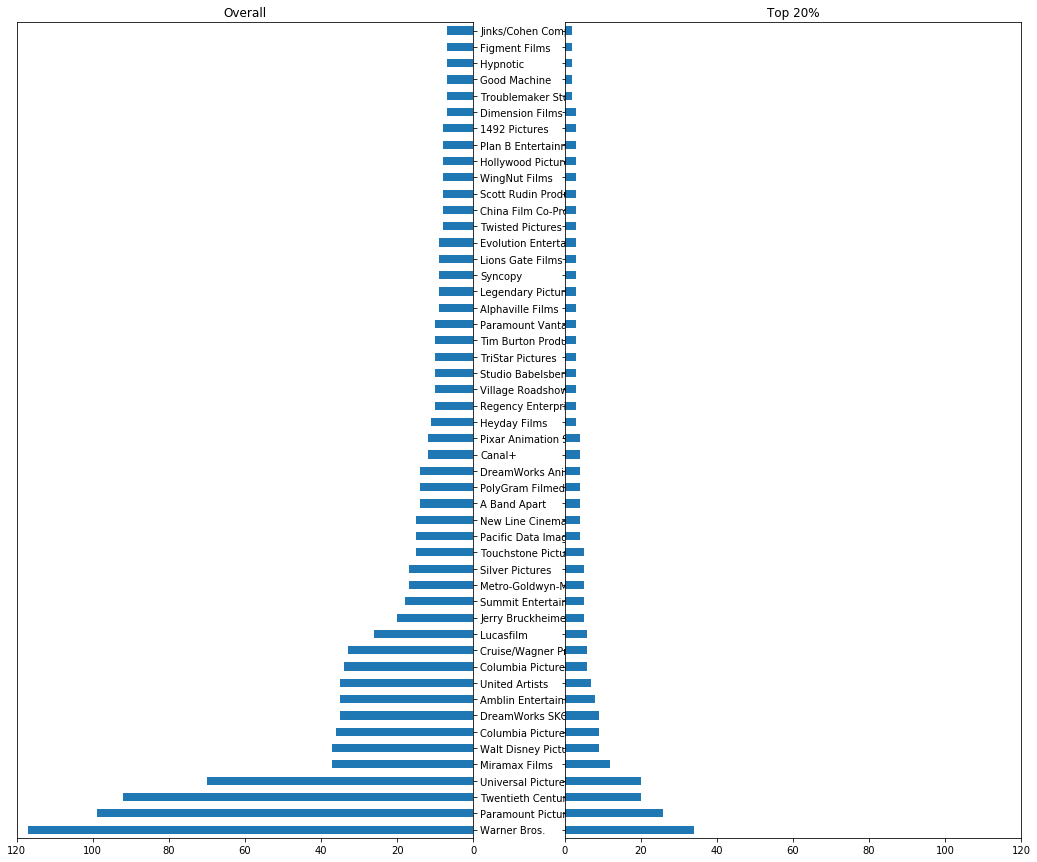

In [53]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
ax.invert_xaxis()
ax.yaxis.tick_right()

companies_vc.head(50).plot(kind='barh', title='Overall', figsize=(18,15), xlim=(120, 0), ax=ax)
top_companies_vc.head(50).plot(kind='barh', title='Top 20%', figsize=(18,15), xlim=(0, 120), ax=ax2)

###### 4.3.2 Plot bar charts for the average popularity of movies produced by each company

Now we want to compare the average popularity of movies of the overall data vs. the top 20% movies, which means `pop_companies` vs. `top_pop_companies`

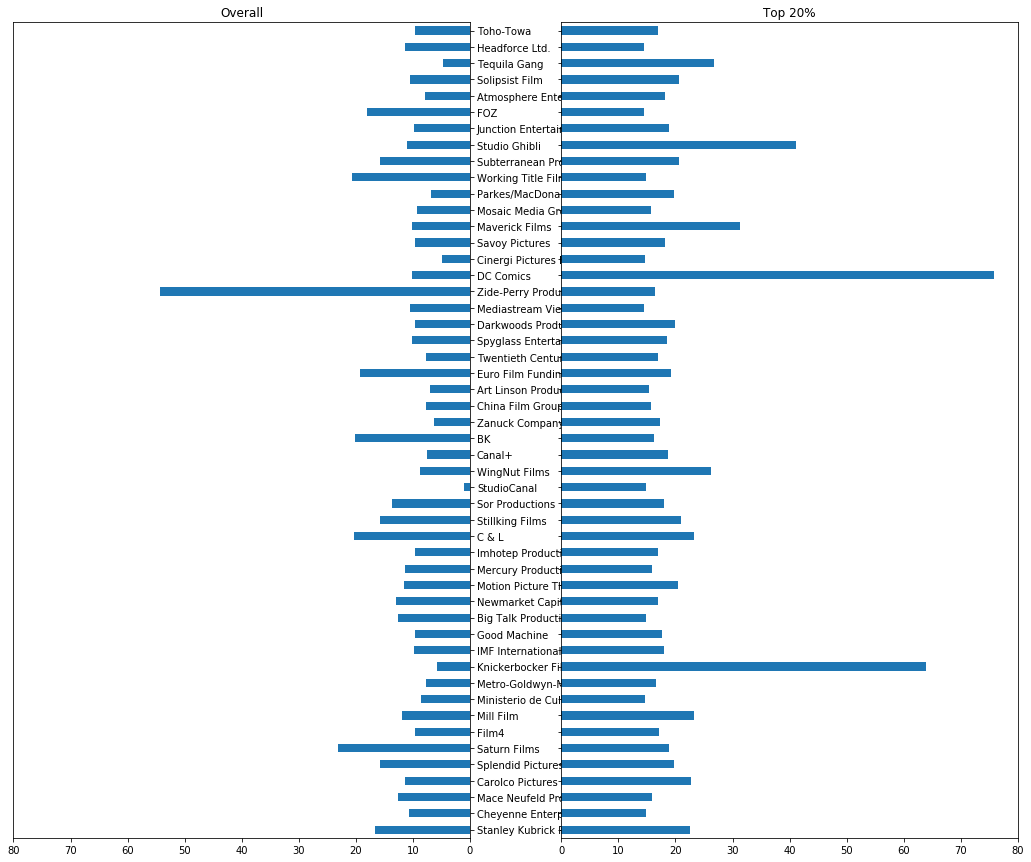

In [54]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
ax.invert_xaxis()
ax.yaxis.tick_right()

pop_companies.head(50).plot(kind='barh', title='Overall', figsize=(18,15), xlim=(80, 0), ax=ax)
top_pop_companies.head(50).plot(kind='barh', title='Top 20%', figsize=(18,15), xlim=(0, 80), ax=ax2)

## 5. Data Analysis and Results

#### 5.1 Analysis based *solely* on [Data Exploration](#3.-Data-Exploration)

According to Exploration [Section 3.2.2](#3.2.2-Get-the-average-net_profit-of-the-top-20%-movies), [Section 3.3.2](#3.3.2-Get-the-average-rating-of-the-top-20%-movies), and [Section 3.4.2](#3.4.2-Get-the-average-vote_average-of-the-top-20%-movies), we can say that `net_profit` is convincingly proportional to `popularity`, while `vote_average` may be a determining factor, but `rating` may somewhat be questionable. Therefore, if all three variables have correlations to `popularity`, then the order of the correlations from strongest to weakest would be:
1. `net_profit`
2. `vote_average`
3. `rating`

We think that the explorations done and shown in [Section 3.5](#3.5-genres-exploration) and [Section 3.6](#3.6-production_companies-exploration) have nothing deterministic towards our analysis, so we need to analyze further from the charts produced.

But again, this part of the analysis is based solely on the Data Exploration, now let's dive deeper and analyze according to the charts!

#### 5.2 Analysis based on [Data Visualization](#4.-Data-Visualization)

As we can see and compare the first two scatter matrices produced in [Section 4.1.1](#4.1.1-Plot-a-scatter-matrix-for-the-overall-data) and [Section 4.1.2](#4.1.2-Plot-a-scatter-matrix-for-the-top-20%-movies), specifically the scatter charts related to `popularity`, we can probably say that these data distribution charts do not give us any further information (as the top 20% movies charts are basically the same as the overall data charts except the fact that only movies with `popularity` greater than `top_pop` get displayed), except that now we know the three variables (`net_profit`, `rating`, `vote_average`) do not linearly correlate to `popularity`, meaning those three do not result in linear graphs.

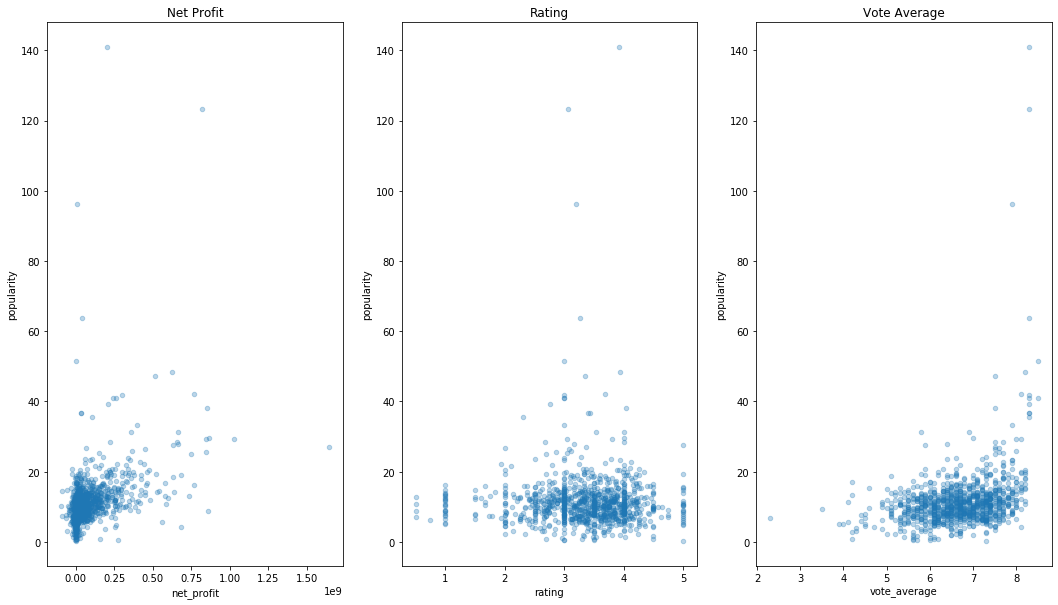

In [55]:
fig, (ax, ax2, ax3) = plt.subplots(ncols=3)

df[['popularity', 'net_profit']].plot(x='net_profit', y='popularity', kind='scatter', alpha=0.3, title='Net Profit', figsize=(18,10), legend=False, ax=ax)
df[['popularity', 'rating']].plot(x='rating', y='popularity', kind='scatter', alpha=0.3, title='Rating', figsize=(18,10), legend=False, ax=ax2)
df[['popularity', 'vote_average']].plot(x='vote_average', y='popularity', kind='scatter', alpha=0.3, title='Vote Average', figsize=(18,10), legend=False, ax=ax3)

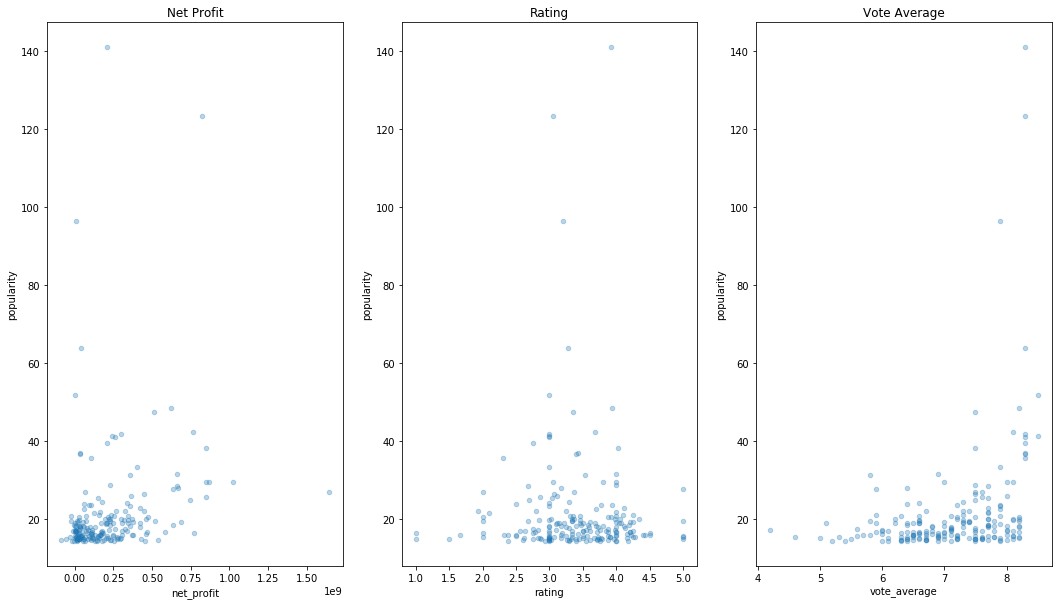

In [56]:
fig, (ax, ax2, ax3) = plt.subplots(ncols=3)

top_df[['popularity', 'net_profit']].plot(x='net_profit', y='popularity', kind='scatter', alpha=0.3, title='Net Profit', figsize=(18,10), legend=False, ax=ax)
top_df[['popularity', 'rating']].plot(x='rating', y='popularity', kind='scatter', alpha=0.3, title='Rating', figsize=(18,10), legend=False, ax=ax2)
top_df[['popularity', 'vote_average']].plot(x='vote_average', y='popularity', kind='scatter', alpha=0.3, title='Vote Average', figsize=(18,10), legend=False, ax=ax3)

As we can see above, the datapoints are scattered all over the place with no particular pattern. Obviously. there are outliers in our data as shown above, which are any records with popularity greater than 30.0 for `df` and any record with popularity greater than 60.0 for `top_df`.

Instead, we analyze these using two different methods:
- Pairwise Correlation: between `popularity`, `net_profit`, `rating`, and `vote_average`
- Linear Model: using OLS

Before we are going to perform the two methods mentioned above, we are first going to remove the outliers from both `df` and `top_df` to avoid misconceptions and miscalculations. Then, we perform 1-sample T-tests to check for the distribution, expecting the null hypothesis of each test to be approximately the area with the darkest shade in the charts above, which are about 11.0 and 19.0 for `df` and `top_df`, correspondingly.

Steps:
1. [Outliers Removal](#5.2.1-Outliers-Removal)
2. [1-sample T-tests](#5.2.2-1-sample-T-tests)
3. [Pairwise Correlation](#5.2.3-Pairwise-Correlation)
4. [Linear Model](#5.2.4-Linear-Model-OLS)

###### 5.2.1 Outliers Removal

In [57]:
new_df = df[df['popularity'] <= 30.0]
new_top_df = top_df[top_df['popularity'] <= 60.0]

###### 5.2.2 1-sample T-tests

*Note:* Use alpha significance value of 0.01

In [58]:
df_pop = new_df['popularity']
df_top_pop = new_top_df['popularity']

In [59]:
st_df, p_df = ttest_1samp(df_pop.values, 11.0)
st_top_df, p_top_df = ttest_1samp(df_top_pop.values, 19.0)

In [60]:
assert p_df >= 0.01
assert p_top_df >= 0.01

###### 5.2.3 Pairwise Correlation

In [61]:
new_df[['popularity', 'net_profit', 'rating', 'vote_average']].corr()

,popularity,net_profit,rating,vote_average
popularity,1.000000,0.502541,-0.009622,0.304169
net_profit,0.502541,1.000000,-0.035096,0.097401
rating,-0.009622,-0.035096,1.000000,0.056829
vote_average,0.304169,0.097401,0.056829,1.000000


In [62]:
new_top_df[['popularity', 'net_profit', 'rating', 'vote_average']].corr()

,popularity,net_profit,rating,vote_average
popularity,1.000000,0.394747,-0.041987,0.371825
net_profit,0.394747,1.000000,0.010517,0.043137
rating,-0.041987,0.010517,1.000000,-0.058792
vote_average,0.371825,0.043137,-0.058792,1.000000


We have collected the correlations from the four variables mentioned from both `df` and `top_df`, but we want to focus to only the first row of each. After all, apparently those three variables are correlated to `popularity` in a way, since none of them have correlation coefficient of zero. Now we want to look deeper about how correlated they are to `popularity`.

One thing that pops out the most is that `rating` and `popularity` have a negative correlation in both DataFrames. This suggests that as `rating` increases, `popularity` decreases. This is against our initial hypothesis, as we thought `rating` would contribute positively to movies' popularity.

If we pay attention to only the first row of the variables correlations and rank them from strongest to weakest, the order would be:
1. `net_profit`
2. `vote_average`
3. `rating`

This observation appears to be consistent with the analysis done in [Section 5.1](#5.1-Analysis-based-solely-on-Data-Exploration) above.

###### 5.2.4 Linear Model OLS

In [63]:
outcome, predictors = patsy.dmatrices('popularity ~ net_profit + rating + vote_average', new_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           5.71e-81
Time:                        01:12:13   Log-Likelihood:                -2714.7
No. Observations:                 982   AIC:                             5437.
Df Residuals:                     978   BIC:                             5457.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0383      1.102     -0.035      0.972      -2.201       2.125
net_profit    1.514e-08   8.42e-10     17.972      0.000    1.35e-08    1.68e-08
rating          -0.0452      0.159     -0.285      0.776      -0.357       0.266
vote_average     1.4505      0.149      9.713      0.000       1.157       1.743
==============================================================================
Omnibus:                       30.926   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.350
Skew:                           0.273   Prob(JB):                     3.17e-11
Kurtosis:                       3.940   Cond. No.                     1.55e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
outcome_top, predictors_top = patsy.dmatrices('popularity ~ net_profit + rating + vote_average', new_top_df)
mod_top = sm.OLS(outcome_top, predictors_top)
res_top = mod_top.fit()
res_top.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     25.21
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           8.53e-14
Time:                        01:12:13   Log-Likelihood:                -624.91
No. Observations:                 196   AIC:                             1258.
Df Residuals:                     192   BIC:                             1271.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.0153      4.346     -0.694      0.489     -11.587       5.556
net_profit    1.113e-08   1.79e-09      6.206      0.000    7.59e-09    1.47e-08
rating          -0.2526      0.615     -0.411      0.682      -1.465       0.960
vote_average     2.9805      0.516      5.775      0.000       1.963       3.998
==============================================================================
Omnibus:                       95.607   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.660
Skew:                           1.988   Prob(JB):                     8.84e-81
Kurtosis:                       8.416   Cond. No.                     3.30e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the p-value shown above, the results suggest that both `net_profit` and `vote_average` significantly predict `popularity`; while `rating` does *not* predict `popularity` really well. Furthermore, looking at the standard errors of both results, it looks like `net_profit` predicts `popularity` better than `vote_average`. Thus, the order of correlations from this method is:
1. `net_profit`
2. `vote_average`
3. `rating`

Again, the order we obtained from [Section 5.1](#5.1-Analysis-based-solely-on-Data-Exploration) prevails.

***

Now, moving onto the analysis of impact of `genres`, we analyze only from the charts produced in:
- [Section 4.2.1](#4.2.1-Plot-bar-charts-for-the-number-of-movies-in-each-genre)
- [Section 4.2.2](#4.2.2-Plot-bar-charts-for-the-average-popularity-of-movies-in-each-genre)

From [Section 4.2.1](#4.2.1-Plot-bar-charts-for-the-number-of-movies-in-each-genre), we can argue that Action is the most popular `genre` in the movies industry according to the bar charts. However, according to [Section 4.2.2](#4.2.2-Plot-bar-charts-for-the-average-popularity-of-movies-in-each-genre), Action movies do not hold the highest `popularity`.

In [65]:
pop_genres.sort_values(ascending=False).head()

Fantasy      14.917978
Animation    13.820256
Family       13.551611
Adventure    12.982606
Action       12.808466
dtype: float64

In [66]:
top_pop_genres.sort_values(ascending=False).head()

Crime              26.359366
Drama              23.082636
Thriller           22.524002
Fantasy            21.737466
Science Fiction    21.665384
dtype: float64

According to the results above, Action movies are in the top 5 on the list of the overall data in terms of their `popularity` on average, but they are not even in the top 5 of the top 20% movies!

These charts and results show that the `popularity` of movies does not depend on how popular the `genres` of the movies are. In other words, movies' `genres` do not determine their `popularity`.

***

Moving onto the last part of the analysis, which is examining the impact of `production_companies`, we analyze only from the charts produced in:
- [Section 4.3.1](#4.3.1-Plot-bar-charts-for-the-number-of-movies-produced-by-each-company)
- [Section 4.3.2](#4.3.2-Plot-bar-charts-for-the-average-popularity-of-movies-produced-by-each-company)

From [Section 4.3.1](#4.3.1-Plot-bar-charts-for-the-number-of-movies-produced-by-each-company), we can argue that Warner Bros. is arguably the most popular `production_company` in the industry according to the bar charts. However, let's see what's the average `popularity` of the movies produced by Warner Bros. below

In [67]:
wb_pop = pop_companies['Warner Bros.']
wb_pop

14.669022538461538

In [68]:
wb_top_pop = top_pop_companies['Warner Bros.']
wb_top_pop

26.38225905882353

The two values printed above are pretty low compared to the ones produced by some other particular companies, and if we try to fit in the two values above in the corresponding charts at [Section 4.3.2](#4.3.2-Plot-bar-charts-for-the-average-popularity-of-movies-produced-by-each-company), they obviously cannot afford to be the number one `production_company` to produce movies with the highest `popularity` on average.

In fact, let's check what's their rank in terms of the movies' average `popularity`.

In [69]:
pop_companies.sort_values(ascending=False).tolist().index(wb_pop)

229

In [70]:
top_pop_companies.sort_values(ascending=False).tolist().index(wb_top_pop)

40

As we can see, Warner Bros. is not in the top 20 `production_companies` on the list of both `df` and `top_df`, and as a matter of fact, they are far from top 20 `production_companies` of `df`.

Therefore, we can come and agree to the same argument as the one stated above in `genres` analysis, which is that `production_companies` do not define their products' (in this case, movies) `popularity`.

## 6. Ethics and Privacy

The data we analyzed is public information that can be collected from film-review websites. That being said, the data we found online is always transparent and free for public use. As we go through our datasets, any data contains personal information will be discarded unhesitatingly to secure the privacy of reviewers. Since some films contain sensitive content, such as discrimination against different minor races and LGBTQ people, we should be aware of bias, and minimize the effect of it on rating as well. Based on that, the data sources, i.e the film-review websites, are credible and legal to ensure that no data will be used inappropriately. 

Regarding the datasets, as mentioned above, the data is accessible and free for the public. Since the dataset may contain certain biases, to minimize the effects of potential bias, we select two datasets that the ratings contained are collected from different reliable film-viewing websites. Additionally, as for the contents of the two particular datasets, the 'movie' dataset contains information only about films, including budgets, genres, popularity and so on. However, the 'ratings' dataset collects the IDs of reviewers, which brings the threat of privacy invasion. Therefore, no matter their IDs are allowed to be shown or not, we discard their IDs for privacy consideration. Besides that, there are no human subjects and no any other personal information exposed in this project. 

In our project, since our goal is to find the factors of popular and successful films, the results of this project are probably used by the movie production companies. What’s more, the results can be used by the entertainment supplier, especially the video websites like ‘YouTube’, ‘Hulu’, and ‘NetFlix’, to provide movies in a specific order. Since this type of results can be used in profit-making, we should be aware of the negative effect due to the expected changes in the film-related industries. The production companies have more interests in the genres of expected popular movies while spending less on indie films and other non-commercial films that usually have a low payback. What’s worse, the video websites will display films in a rank of popularity so the audiences are more likely to watch the popular ones first, which harms the profit of the non-commercial films. Therefore, instead of focusing on the short-term profit-earning, every viewer in film-related industry should consider more about the future of benign development of the industry.


## 7. Conclusion and Discussion

The factors that mainly determine the `popularity` of the movies are `net_profit` (revenue) and `vote_average`. Both `net_profit` and `vote_average` significantly predict `popularity`, they are positively proportional to movies' popularity; in particular, `net_profit` predicts popularity a little better than `vote_average`. As discussed above, `net_profit` is highly proportional to `popularity`; the top 20% of `net_profit` is greater than average `net_profit `and surpasses the 75% percentile. The `vote_average` of top 20% movies is greater than average `vote_average`, however it does not surpass the 75th percentile, which means the `vote_average` sufficiently determines the `popularity` of the movies, but is not as determining of a factor as `net_profit`.

`Rating` does not predict popularity well, and actually has negative correlation to `popularity`. We expected `rating` to have positive correlation to the `popularity` of movies, since the average `rating` of the top 20% movies is greater, though just slightly, than the overall average. However, after digging into and analyzing the data, we find out that `rating` is inversely proportional to the `popularity`. That being said, as `rating` increases, `popularity` decreases. They have negative correlation. 

Movies' `genres` do not determine their `popularity`. Our findings in data analysis show that action movies are not popular in top 20% movies in general, even though action is the most popular `genre` in the overall data. The charts and results show that the `popularity` of movies themselves does not depend on how popular the `genres` are. Even though some particular genres are popular among top movies, it does not mean that every movie in those genres have high `popularity` values.

`production_companies` do not define the `popularity` of movies they produce. In Section 3, after we got the statistic result, we thought initially that `production_companies` determine the `popuarity`, since famous `production_companies` like Warner Bros, Paramount Pictures, and Twentieth Century Fox Film Corporation dominate the top movies dataset. However, after data analysis, we found out that the top companites like Warner Bros are not even in the list of top 20% popular movies. Hence, big `production_companies` may not have produce movies with high `popularity` values.

All in all, we missed a bit from our hypothesis. We hypothesized that `net_profit`, `rating`, and `vote_average` are determining factors, but `genres` and `production_companies` are not. Now that we have reached to the conclusion part, we now realize that `rating` is not a determining factor of the movies, which is against the hypothesis, but the rest align just fine with the hypothesis. Thus, to put everything in an explicit manner, `net_profit` and `vote_average` are determining factors to define the `popularity` of movies; while `rating`, `genres`, `production_companies` are not.